In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_excel("GymSubs.xlsx", parse_dates=['dob'])

In [4]:
df.head(5)

,user_id,target,name,sex,dob,location,location_population,occupation,hobbies,daily_commute,friends_number,relationship_status,education,credit_card_type
0,0,1,Halina,NaN,1982-08-07,Piastów,22732,Teaching professionals,Fitness,46.0,196,Single,NaN,Visa
1,1,0,Eustachy,male,1971-10-28,Sokółka,18331,General and keyboard clerks,"LARPing,Foreign language learning,Netball",55.0,243,Single,NaN,NaN
2,2,1,Egon,NaN,2000-07-05,Łaskarzew,4879,Protective services workers,"Bodybuilding,Kabaddi",90.0,191,In relationship,3.0,NaN
3,3,0,Eulalia,female,1992-06-10,Bydgoszcz,352313,Customer services clerks,Badminton,88.0,164,In relationship,3.0,Visa
4,4,0,Hilary,NaN,1975-01-09,Osieczna,2322,Refuse workers and other elementary workers,"Fitness,Embroidery,Lacemaking",40.0,119,Married with kids,5.0,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
user_id                4000 non-null int64
target                 4000 non-null int64
name                   3982 non-null object
sex                    3616 non-null object
dob                    3606 non-null datetime64[ns]
location               4000 non-null object
location_population    4000 non-null int64
occupation             4000 non-null object
hobbies                3320 non-null object
daily_commute          3595 non-null float64
friends_number         4000 non-null int64
relationship_status    3607 non-null object
education              3592 non-null float64
credit_card_type       3572 non-null object
dtypes: datetime64[ns](1), float64(2), int64(4), object(7)
memory usage: 437.6+ KB


In [6]:
df.describe()

,user_id,target,location_population,daily_commute,friends_number,education
count,4000.000000,4000.000000,4.000000e+03,3595.000000,4000.000000,3592.000000
mean,1999.500000,0.201500,3.105877e+05,50.098748,199.877750,3.670935
std,1154.844867,0.401171,4.878360e+05,28.806060,90.494937,1.327582
min,0.000000,0.000000,7.860000e+02,0.000000,0.000000,1.000000
25%,999.750000,0.000000,2.435725e+04,25.000000,143.000000,3.000000
50%,1999.500000,0.000000,8.007200e+04,50.000000,199.000000,4.000000
75%,2999.250000,0.000000,3.523130e+05,75.000000,256.000000,5.000000
max,3999.000000,1.000000,1.764615e+06,99.000000,619.000000,6.000000


In [7]:
df.describe(include=['O'])

,name,sex,location,occupation,hobbies,relationship_status,credit_card_type
count,3982,3616,4000,4000,3320,3607,3572
unique,208,2,645,43,2745,5,4
top,Franciszek,female,Warszawa,Science and engineering associate professionals,Gym,In relationship,Visa
freq,38,2040,332,106,20,1247,1777


## zmienna celu 

In [8]:
df["target"].value_counts()

0    3194
1     806
Name: target, dtype: int64

In [9]:
df["target"].value_counts(normalize=True)

0    0.7985
1    0.2015
Name: target, dtype: float64

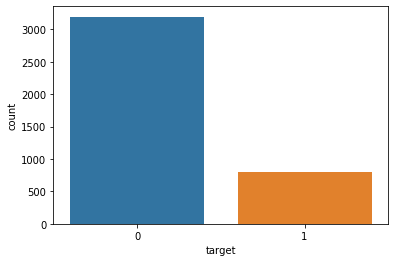

In [10]:
sns.countplot(data=df, x='target')

## zmienne kategoryczne

In [11]:
zmienne_kategoryczne=["sex","relationship_status","credit_card_type","education"]

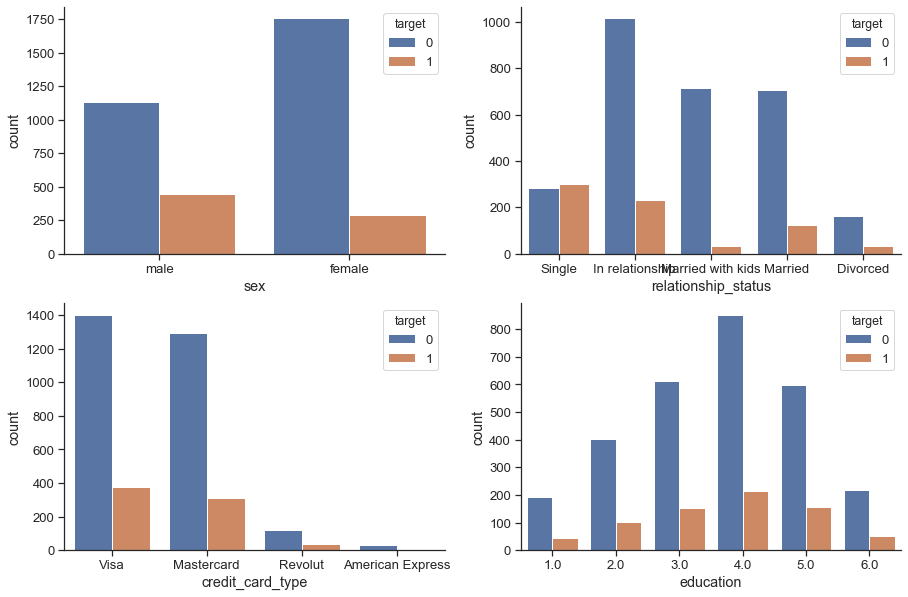

In [12]:
plt.figure(figsize=(15, 10))
sns.set(font_scale= 1.2)
sns.set_style('ticks')

for i, feature in enumerate(zmienne_kategoryczne):
    plt.subplot(2, 2, i+1)
    sns.countplot(data=df, x=feature, hue='target')  
    
sns.despine()

In [13]:
df[["sex","target"]].groupby(["sex"], as_index=False).mean().sort_values(by="target", ascending=False)

,sex,target
1,male,0.282995
0,female,0.139706


In [14]:
df[["relationship_status","target"]].groupby(["relationship_status"], as_index=False).mean().sort_values(by="target",ascending=False)

,relationship_status,target
4,Single,0.512821
1,In relationship,0.185245
0,Divorced,0.178571
2,Married,0.149398
3,Married with kids,0.042724


In [15]:
df[["credit_card_type","target"]].groupby(["credit_card_type"], as_index=False).mean().sort_values(by="target", ascending=False)

,credit_card_type,target
2,Revolut,0.229299
3,Visa,0.211030
0,American Express,0.200000
1,Mastercard,0.194011


In [16]:
df[["education","target"]].groupby(["education"], as_index=False).mean().sort_values(by="target", ascending=False)

,education,target
4,5.0,0.206623
1,2.0,0.200397
3,4.0,0.200000
2,3.0,0.197386
5,6.0,0.197026
0,1.0,0.183761


## zmienne ilościowe 

#### zamiana zmiennej dob - data urodzenia na wiek

In [17]:
df["Age"]=df["dob"].apply(lambda x: 2021-x.year)

In [18]:
df["Age"].describe()

count    3606.000000
mean       42.437327
std        13.548734
min        20.000000
25%        32.000000
50%        42.000000
75%        52.000000
max        99.000000
Name: Age, dtype: float64

In [19]:
df.drop("dob" ,axis=1, inplace=True)

In [20]:
df["Age"].value_counts()

21.0    187
22.0    117
43.0    108
45.0    107
39.0    106
       ... 
88.0      1
81.0      1
94.0      1
86.0      1
85.0      1
Name: Age, Length: 70, dtype: int64

In [21]:
df.head()

,user_id,target,name,sex,location,location_population,occupation,hobbies,daily_commute,friends_number,relationship_status,education,credit_card_type,Age
0,0,1,Halina,NaN,Piastów,22732,Teaching professionals,Fitness,46.0,196,Single,NaN,Visa,39.0
1,1,0,Eustachy,male,Sokółka,18331,General and keyboard clerks,"LARPing,Foreign language learning,Netball",55.0,243,Single,NaN,NaN,50.0
2,2,1,Egon,NaN,Łaskarzew,4879,Protective services workers,"Bodybuilding,Kabaddi",90.0,191,In relationship,3.0,NaN,21.0
3,3,0,Eulalia,female,Bydgoszcz,352313,Customer services clerks,Badminton,88.0,164,In relationship,3.0,Visa,29.0
4,4,0,Hilary,NaN,Osieczna,2322,Refuse workers and other elementary workers,"Fitness,Embroidery,Lacemaking",40.0,119,Married with kids,5.0,NaN,46.0


In [22]:
zmienne_ilosciowe=["Age","daily_commute"]

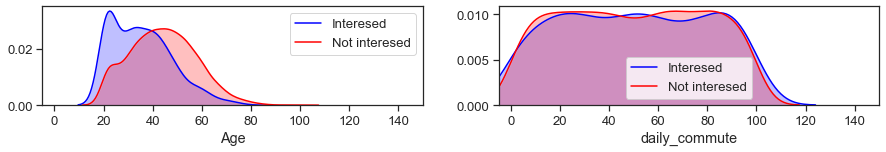

In [23]:
plt.figure(figsize=(15, 4))
sns.set(font_scale= 1.2)
sns.set_style('ticks')

for i, feature in enumerate(zmienne_ilosciowe):
    plt.subplot(2, 2, i+1)
    ax = sns.kdeplot(df[feature][df['target'] == 1], color="blue", shade=True)
    sns.kdeplot(df[feature][df['target'] == 0], color="red", shade=True)
    plt.legend(['Interesed', 'Not interesed'])
    ax.set(xlabel=feature)
    plt.xlim(-5,150) 

(-5, 400)

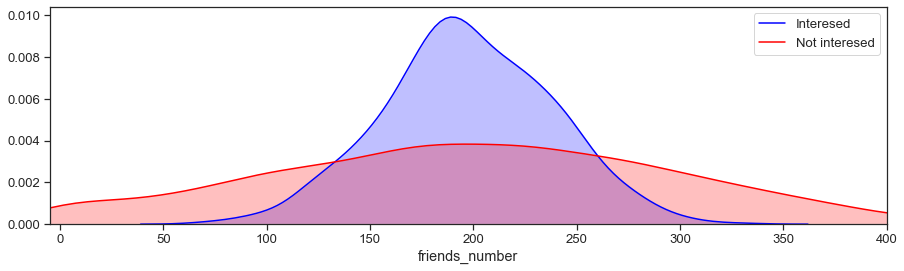

In [24]:
plt.figure(figsize=(15, 4))
sns.set(font_scale= 1.2)
sns.set_style('ticks')
ax = sns.kdeplot(df["friends_number"][df['target'] == 1], color="blue", shade=True)
sns.kdeplot(df["friends_number"][df['target'] == 0], color="red", shade=True)
plt.legend(['Interesed', 'Not interesed'])
ax.set(xlabel="friends_number")
plt.xlim(-5,400) 

(-5, 1000000)

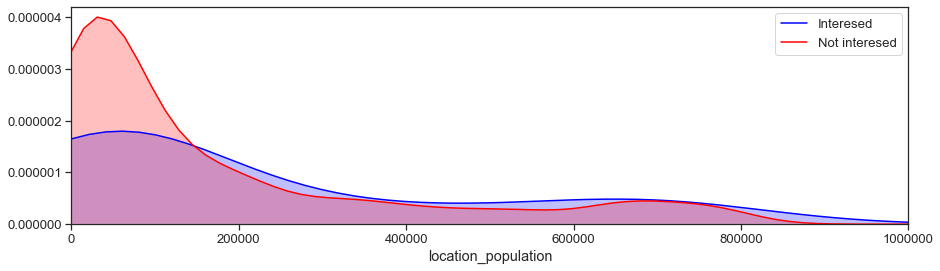

In [25]:
plt.figure(figsize=(15, 4))
sns.set(font_scale= 1.2)
sns.set_style('ticks')

ax = sns.kdeplot(df["location_population"][df['target'] == 1], color="blue", shade=True)
sns.kdeplot(df["location_population"][df['target'] == 0], color="red", shade=True)
plt.legend(['Interesed', 'Not interesed'])
ax.set(xlabel="location_population")
plt.xlim(-5,1000000) 


In [26]:
df.groupby("target").agg({"Age":["mean", "median"],
                        "daily_commute":["mean", "median"],
                        "friends_number":["mean", "median"],
                        "location_population": ["mean", "median"]})

Age        daily_commute        friends_number         \
             mean median          mean median           mean median   
target                                                                
0       44.189302   44.0     50.027206   50.0     200.512210    200   
1       35.499312   34.0     50.380495   50.5     197.363524    196   

       location_population          
                      mean  median  
target                              
0            287938.329368   74312  
1            400341.964020  113621

## Czyszczenie danych 

In [27]:
zmienne_kategoryczne=["sex","relationship_status","credit_card_type","education"]

In [28]:
for x in zmienne_kategoryczne:
    print(df[x].value_counts(), '\n')

female    2040
male      1576
Name: sex, dtype: int64 

In relationship      1247
Married               830
Married with kids     749
Single                585
Divorced              196
Name: relationship_status, dtype: int64 

Visa                1777
Mastercard          1603
Revolut              157
American Express      35
Name: credit_card_type, dtype: int64 

4.0    1065
3.0     765
5.0     755
2.0     504
6.0     269
1.0     234
Name: education, dtype: int64 



In [29]:
df.drop("user_id", axis=1, inplace=True)

In [30]:
df.head()

,target,name,sex,location,location_population,occupation,hobbies,daily_commute,friends_number,relationship_status,education,credit_card_type,Age
0,1,Halina,NaN,Piastów,22732,Teaching professionals,Fitness,46.0,196,Single,NaN,Visa,39.0
1,0,Eustachy,male,Sokółka,18331,General and keyboard clerks,"LARPing,Foreign language learning,Netball",55.0,243,Single,NaN,NaN,50.0
2,1,Egon,NaN,Łaskarzew,4879,Protective services workers,"Bodybuilding,Kabaddi",90.0,191,In relationship,3.0,NaN,21.0
3,0,Eulalia,female,Bydgoszcz,352313,Customer services clerks,Badminton,88.0,164,In relationship,3.0,Visa,29.0
4,0,Hilary,NaN,Osieczna,2322,Refuse workers and other elementary workers,"Fitness,Embroidery,Lacemaking",40.0,119,Married with kids,5.0,NaN,46.0


### przekształcanie zmiennej occupation

In [31]:
df["occupation"].value_counts()

Science and engineering associate professionals                                      106
Health associate professionals                                                       105
Information and communications technology professionals                              104
Information and communications technicians                                           103
Food processing, wood working, garment and other craft and related trades workers    103
General and keyboard clerks                                                          103
Legal, social, cultural and related associate professionals                          102
Refuse workers and other elementary workers                                          101
Handicraft and printing workers                                                      101
Armed forces occupations, other ranks                                                100
Non-commissioned armed forces officers                                               100
Protective services w

In [32]:
df.occupation.apply(lambda x: x.split(' ')[-1].strip())

0       professionals
1              clerks
2             workers
3              clerks
4             workers
            ...      
3995          workers
3996     electricians
3997          workers
3998          workers
3999    professionals
Name: occupation, Length: 4000, dtype: object

In [33]:
df['occupation'] = df.occupation.apply(lambda x: x.split(' ')[-1].strip())

In [34]:
df["occupation"].value_counts()

workers          1213
professionals     997
clerks            282
managers          274
officers          177
operators         158
technicians       103
ranks             100
legislators        95
electricians       92
labourers          91
Assemblers         89
assistants         89
helpers            83
transport          83
gatherers          74
Name: occupation, dtype: int64

In [35]:
df["occupation"]=df["occupation"].apply(lambda x: "workers" if x in["transport", "helpers","gatherers", "Assemblers", "labourers", "assistants","electricians", "operators"] else x)

In [36]:
df["occupation"]=df["occupation"].apply(lambda x: "professionals" if x in["technicians"] else x)

In [37]:
df["occupation"]=df["occupation"].apply(lambda x: "officers" if x in["ranks"] else x)

In [38]:
df["occupation"]=df["occupation"].apply(lambda x: "managers" if x in["legislators"] else x)

In [39]:
df["occupation"].value_counts()

workers          1972
professionals    1100
managers          369
clerks            282
officers          277
Name: occupation, dtype: int64

In [40]:
df.isna().sum()

target                   0
name                    18
sex                    384
location                 0
location_population      0
occupation               0
hobbies                680
daily_commute          405
friends_number           0
relationship_status    393
education              408
credit_card_type       428
Age                    394
dtype: int64

In [41]:
df.isna().sum()

target                   0
name                    18
sex                    384
location                 0
location_population      0
occupation               0
hobbies                680
daily_commute          405
friends_number           0
relationship_status    393
education              408
credit_card_type       428
Age                    394
dtype: int64

### przekształcenia zmiennej hobbies 

In [42]:
a=lambda x: str(x)
df["hobbies"]=df['hobbies'].apply(a)

In [43]:
df["hobbies"]=df.hobbies.apply(lambda x: x.split(','))

In [44]:
df["hobbies"]

0                                           [Fitness]
1       [LARPing, Foreign language learning, Netball]
2                             [Bodybuilding, Kabaddi]
3                                         [Badminton]
4                   [Fitness, Embroidery, Lacemaking]
                            ...                      
3995                                            [nan]
3996                                            [nan]
3997                          [Photography, Graffiti]
3998                                     [Stretching]
3999           [Crossfit, Digital arts, Cryptography]
Name: hobbies, Length: 4000, dtype: object

In [45]:
lista=[]

In [46]:
for x in df["hobbies"]:
    lista=lista+x
        

In [47]:
zbior=set(lista)

In [48]:
zbior

{'3D printing',
 'Acting',
 'Air sports',
 'Amateur radio',
 'Archery',
 'Astronomy',
 'BASE jumping',
 'Backpacking',
 'Badminton',
 'Baseball',
 'Basketball',
 'Beekeeping',
 'Bird watching',
 'Blacksmithing',
 'Board games',
 'Board sports',
 'Bodybuilding',
 'Book restoration',
 'Brazilian jiu-jitsu',
 'Cabaret',
 'Calligraphy',
 'Candle making',
 'Cardio',
 'Coffee roasting',
 'Coloring',
 'Community',
 'Computer programming',
 'Cooking',
 'Cosplaying',
 'Creative writing',
 'Crocheting',
 'Crossfit',
 'Cryptography',
 'Cycling',
 'Dance',
 'Digital arts',
 'Do it yourself',
 'Dowsing',
 'Drama',
 'Drawing',
 'Driving',
 'Electronics',
 'Embroidery',
 'Fashion',
 'Fishing',
 'Fitness',
 'Flag Football',
 'Flower arranging',
 'Flying',
 'Flying disc',
 'Foraging',
 'Foreign language learning',
 'Gambling',
 'Gaming',
 'Gardening',
 'Genealogy',
 'Geocaching',
 'Ghost hunting',
 'Glassblowing',
 'Graffiti',
 'Gunsmithing',
 'Gym',
 'Handball',
 'Hiking',
 'Homebrewing',
 'Hooping',


In [49]:
lista_sportow=[
 'Air sports',
 'Archery',
 'BASE jumping',
 'Backpacking',
 'Badminton',
 'Baseball',
 'Basketball',
 'Board sports',
 'Bodybuilding',
 'Brazilian jiu-jitsu',
 'Cardio',
 'Crossfit',
 'Cycling',
 'Dance',
 'Fitness',
 'Flag Football',
 'Flying disc',
 'Gym',
 'Handball',
 'Hiking',
 'Hooping',
 'Horseback riding',
 'Ice skating',
 'Inline skating',
 'Jogging',
 'Juggling',
 'Kabaddi',
 'Kayaking',
 'Kettleballs',
 'Kite flying',
 'Kitesurfing',
 'Motor sports',
 'Mountain biking',
 'Mountaineering',
 'Netball',
 'Nordic skating',
 'Orienteering',
 'Paintball',
 'Parkour',
 'Poi',
 'Polo',
 'Power bike',
 'Rafting',
 'Rappelling',
 'Rock climbing',
 'Roller skating',
 'Rowing',
 'Rugby',
 'Running',
 'Sailing',
 'Scuba diving',
 'Skateboarding',
 'Skiing',
 'Skimboarding',
 'Skydiving',
 'Slacklining',
 'Snowboarding',
 'Sports',
 'Squash',
 'Stretching',
 'Surfing',
 'Swimming',
 'Table tennis',
 'Taekwondo',
 'Tai chi',
 'Urban exploration',
 'Water sports',
 'Weightlifting',
 'Yoga']

In [50]:
df["sports_interests"]=df["hobbies"].apply(lambda x: 1 if any(item in x for item in lista_sportow) else 0 )

In [51]:
df["sports_interests"]

0       1
1       1
2       1
3       1
4       1
       ..
3995    0
3996    0
3997    0
3998    1
3999    1
Name: sports_interests, Length: 4000, dtype: int64

In [52]:
df[["sports_interests","target"]].groupby(["sports_interests"], as_index=False).mean().sort_values(by="target", ascending=False)

,sports_interests,target
1,1,0.248024
0,0,0.109456


In [53]:
df[["occupation","target"]].groupby(["occupation"], as_index=False).mean().sort_values(by="target", ascending=False)

,occupation,target
2,officers,0.227437
4,workers,0.209432
3,professionals,0.196364
1,managers,0.176152
0,clerks,0.173759


## Podział zbioru na testowy i treningowy 

In [54]:
X=df.drop(["target"], axis=1)

In [55]:
y=df["target"]

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=99)

## Analiza wartości odstających 

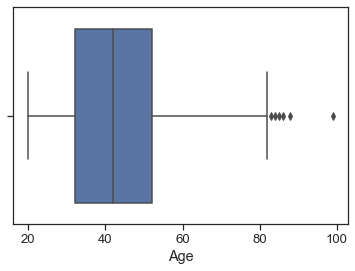

In [58]:
sns.boxplot(X_train["Age"])

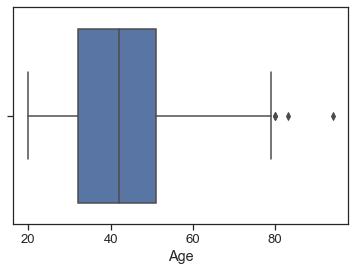

In [59]:
sns.boxplot(X_test["Age"])

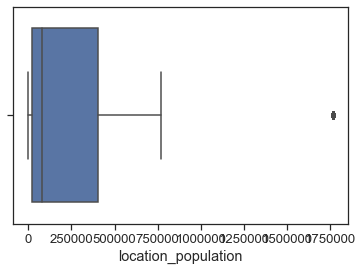

In [60]:
sns.boxplot(X_train["location_population"])

In [61]:
X_train["location_population"].idxmax()

189

In [62]:
X_train.loc[189] 

name                                             Erwin
sex                                                NaN
location                                      Warszawa
location_population                            1764615
occupation                               professionals
hobbies                [Crossfit, Rowing, 3D printing]
daily_commute                                       29
friends_number                                     255
relationship_status                    In relationship
education                                            4
credit_card_type                                  Visa
Age                                                 38
sports_interests                                     1
Name: 189, dtype: object

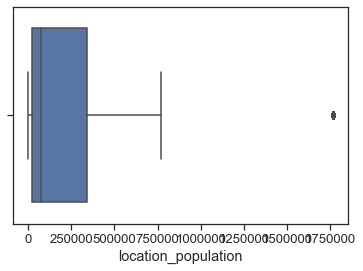

In [63]:
sns.boxplot(X_test["location_population"])

In [64]:
X_test["location_population"].idxmax()

3685

In [65]:
X_test.loc[3685]

name                                 Arkadiusz
sex                                       male
location                              Warszawa
location_population                    1764615
occupation                       professionals
hobbies                [Community, Air sports]
daily_commute                               66
friends_number                               0
relationship_status            In relationship
education                                    3
credit_card_type                          Visa
Age                                        NaN
sports_interests                             1
Name: 3685, dtype: object

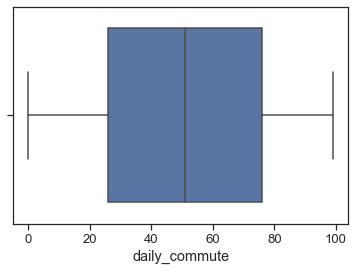

In [66]:
sns.boxplot(X_train["daily_commute"])

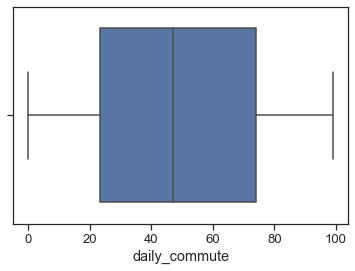

In [67]:
sns.boxplot(X_test["daily_commute"])

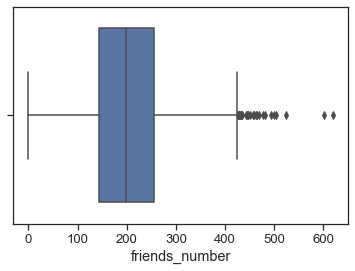

In [68]:
sns.boxplot(X_train["friends_number"])

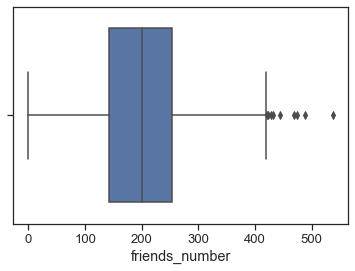

In [69]:
sns.boxplot(X_test["friends_number"])

In [70]:
zmienne_do_winsoryzacji=["Age","friends_number"]

In [71]:
for i in zmienne_do_winsoryzacji:
    max_threshold= X_train[i].quantile(0.999)
    index_max_train=X_train[X_train[i]>max_threshold].index
    index_max_test=X_test[X_test[i]>max_threshold].index
    X_train.loc[index_max_train, i]=max_threshold
    X_test.loc[index_max_test, i]=max_threshold


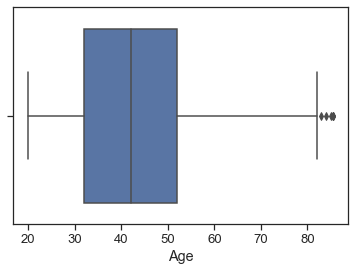

In [72]:
sns.boxplot(X_train["Age"])

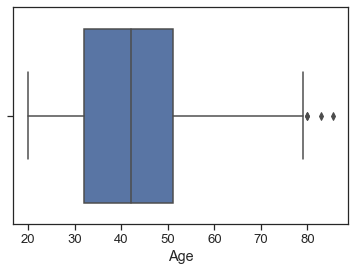

In [73]:
sns.boxplot(X_test["Age"])

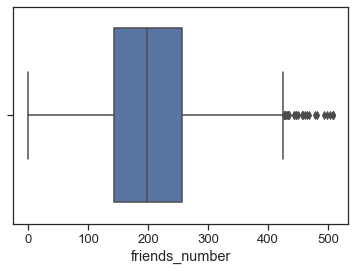

In [74]:
sns.boxplot(X_train["friends_number"])

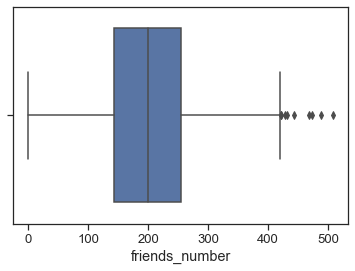

In [75]:
sns.boxplot(X_test["friends_number"])

## Braki danych 

In [76]:
X_train.isnull().sum()

name                    13
sex                    260
location                 0
location_population      0
occupation               0
hobbies                  0
daily_commute          275
friends_number           0
relationship_status    280
education              292
credit_card_type       293
Age                    278
sports_interests         0
dtype: int64

In [77]:
X_test.isnull().sum()

name                     5
sex                    124
location                 0
location_population      0
occupation               0
hobbies                  0
daily_commute          130
friends_number           0
relationship_status    113
education              116
credit_card_type       135
Age                    116
sports_interests         0
dtype: int64

### uzupełnianie zmiennej sex

In [78]:
df.sort_values(by="name", na_position="first").head(20)

,target,name,sex,location,location_population,occupation,hobbies,daily_commute,friends_number,relationship_status,education,credit_card_type,Age,sports_interests
222,0,NaN,male,Żagań,26148,workers,"[Kettleballs, Stretching, Juggling]",55.0,98,Married with kids,2.0,Visa,21.0,1
725,1,NaN,male,Sulęcin,10168,workers,[nan],23.0,266,In relationship,4.0,NaN,NaN,0
760,0,NaN,male,Września,30279,professionals,[Polo],14.0,261,In relationship,3.0,Visa,54.0,1
1065,1,NaN,male,Pruszcz Gdański,30468,professionals,"[Fitness, Crossfit, Squash, Astronomy, Writing]",NaN,182,Single,4.0,Visa,50.0,1
1319,0,NaN,male,Gliwice,181309,managers,[Dance],87.0,139,Married,3.0,Mastercard,NaN,1
1350,0,NaN,male,Poznań,538633,workers,"[Stretching, Tai chi, Shooting, Kitesurfing]",18.0,217,Married with kids,3.0,Visa,58.0,1
1628,1,NaN,male,Warszawa,1764615,workers,"[Power bike, Glassblowing, Scouting]",40.0,198,Married with kids,2.0,Visa,37.0,1
2046,1,NaN,male,Warszawa,1764615,professionals,"[Badminton, Gym, Amateur radio, Parkour]",90.0,249,Married,NaN,Visa,33.0,1
2155,0,NaN,male,Gdańsk,464254,workers,[nan],32.0,319,Married with kids,1.0,Mastercard,45.0,0
2290,0,NaN,male,Reszel,4615,workers,[Gaming],NaN,235,Single,4.0,Revolut,NaN,0


In [79]:
a=lambda x: str(x)[-1]
X_train["name"]=X_train['name'].apply(a)
X_test["name"]=X_test["name"].apply(a)

In [80]:
def kobieta_czy_mezczyzna(x):
    if x["name"]=="a":
        return "female"
    else:
        return "male"   

In [81]:
X_train.loc[:,"sex"]=np.where(X_train["sex"].isna(), X_train.apply(kobieta_czy_mezczyzna, axis=1),X_train["sex"])

In [82]:
X_test.loc[:,"sex"]=np.where(X_test["sex"].isna(), X_test.apply(kobieta_czy_mezczyzna, axis=1),X_test["sex"])

In [83]:
X_train.isnull().sum()

name                     0
sex                      0
location                 0
location_population      0
occupation               0
hobbies                  0
daily_commute          275
friends_number           0
relationship_status    280
education              292
credit_card_type       293
Age                    278
sports_interests         0
dtype: int64

In [84]:
X_test.isnull().sum()

name                     0
sex                      0
location                 0
location_population      0
occupation               0
hobbies                  0
daily_commute          130
friends_number           0
relationship_status    113
education              116
credit_card_type       135
Age                    116
sports_interests         0
dtype: int64

### uzupełnianie zmiennej age

In [85]:
X_train["Age"].skew()

0.2905774124551979

In [86]:
X_test["Age"].skew()

0.2946743324407233

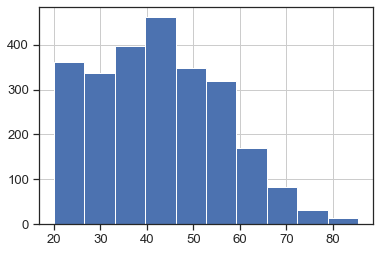

In [87]:
X_train['Age'].hist()

In [88]:
df.corr()['Age'].sort_values()

target                -0.257361
sports_interests      -0.034806
location_population   -0.026143
education              0.006325
daily_commute          0.014922
friends_number         0.026671
Age                    1.000000
Name: Age, dtype: float64

In [89]:
age_agg = X_train.groupby(["relationship_status","sex","education"]).agg({'Age': 'mean'})

In [90]:
age_agg

Age
relationship_status sex    education           
Divorced            female 1.0        43.000000
                           2.0        46.857143
                           3.0        40.363636
                           4.0        44.285714
                           5.0        48.916667
                           6.0        54.000000
                    male   1.0        61.000000
                           2.0        40.000000
                           3.0        42.714286
                           4.0        44.950000
                           5.0        42.300000
                           6.0        32.000000
In relationship     female 1.0        43.800000
                           2.0        44.545455
                           3.0        44.773333
                           4.0        43.024194
                           5.0        42.061356
                           6.0        42.461538
                    male   1.0        40.045455
                           2.0        40.755556
                           3.0        43.138889
                           4.0        43.697571
                           5.0        41.477612
                           6.0        42.706172
Married             female 1.0        46.500000
                           2.0        44.113636
                           3.0        40.730769
                           4.0        44.671233
                           5.0        47.725490
                           6.0        39.909091
                    male   1.0        42.400000
                           2.0        38.222222
                           3.0        44.580645
                           4.0        40.118644
                           5.0        45.368421
                           6.0        45.384615
Married with kids   female 1.0        42.625000
                           2.0        41.533333
                           3.0        42.346154
                           4.0        44.063291
                           5.0        44.559322
                           6.0        41.687500
                    male   1.0        39.857143
                           2.0        47.500000
                           3.0        45.763158
                           4.0        42.692308
                           5.0        42.028571
                           6.0        45.666667
Single              female 1.0        39.300000
                           2.0        39.785714
                           3.0        45.465116
                           4.0        39.978261
                           5.0        37.000000
                           6.0        39.000000
                    male   1.0        37.000000
                           2.0        36.777778
                           3.0        39.700000
                           4.0        37.207547
                           5.0        38.363636
                           6.0        33.846154

In [91]:
X_train["Age"].mean()

42.53903132434576

In [92]:
age_agg = age_agg.reset_index()

In [93]:
age_agg

,relationship_status,sex,education,Age
0,Divorced,female,1.0,43.000000
1,Divorced,female,2.0,46.857143
2,Divorced,female,3.0,40.363636
3,Divorced,female,4.0,44.285714
4,Divorced,female,5.0,48.916667
5,Divorced,female,6.0,54.000000
6,Divorced,male,1.0,61.000000
7,Divorced,male,2.0,40.000000
8,Divorced,male,3.0,42.714286
9,Divorced,male,4.0,44.950000


In [94]:
X_train = pd.merge(X_train, age_agg, how='left', on=['education','sex',"relationship_status"])

In [95]:
X_train.head()

,name,sex,location,location_population,occupation,hobbies,daily_commute,friends_number,relationship_status,education,credit_card_type,Age_x,sports_interests,Age_y
0,a,female,Ciechanów,44303,professionals,"[Water sports, Sudoku]",97.0,164.0,NaN,4.0,Visa,22.0,1,NaN
1,y,male,Nowy Tomyśl,14702,officers,"[Stretching, Glassblowing]",83.0,203.0,Single,2.0,Visa,21.0,1,36.777778
2,n,male,Sulęcin,10168,workers,[nan],23.0,266.0,In relationship,4.0,NaN,NaN,0,43.697571
3,a,female,Poznań,538633,workers,"[Rowing, Stretching, Power bike, Nordic skating]",NaN,198.0,Single,3.0,Mastercard,22.0,1,45.465116
4,a,female,Kielce,196804,professionals,"[Surfing, Woodworking]",78.0,78.0,In relationship,NaN,Mastercard,35.0,1,NaN


In [96]:
X_train['Age'] = np.where(X_train['Age_x'].isna(), X_train['Age_y'].round(), X_train['Age_x'])

In [97]:
X_train.drop(['Age_x', 'Age_y'], axis=1, inplace=True)

#### dla X_test

In [98]:
X_test = pd.merge(X_test, age_agg, how='left', on=['education','sex',"relationship_status"])

In [99]:
X_test['Age'] = np.where(X_test['Age_x'].isna(), X_test['Age_y'].round(), X_test['Age_x'])

In [100]:
X_test.drop(['Age_x', 'Age_y'], axis=1, inplace=True)

In [101]:
X_test.head()

,name,sex,location,location_population,occupation,hobbies,daily_commute,friends_number,relationship_status,education,credit_card_type,sports_interests,Age
0,n,male,Sandomierz,23863,workers,[Cardio],89.0,199.0,In relationship,5.0,Mastercard,1,31.0
1,y,male,Kłodawa,6530,clerks,[nan],63.0,125.0,In relationship,3.0,Mastercard,0,42.0
2,a,female,Pieńsk,5866,workers,"[Glassblowing, Kitesurfing, Pet]",25.0,188.0,Married,3.0,Mastercard,1,63.0
3,a,female,Świebodzin,21954,professionals,"[Stretching, Sketching, Coloring, Fashion]",90.0,299.0,Married,4.0,Revolut,1,26.0
4,a,female,Bytom,168394,officers,"[Gym, Rowing]",37.0,189.0,Married,2.0,Visa,1,22.0


In [102]:
X_train.isnull().sum()

name                     0
sex                      0
location                 0
location_population      0
occupation               0
hobbies                  0
daily_commute          275
friends_number           0
relationship_status    280
education              292
credit_card_type       293
sports_interests         0
Age                     50
dtype: int64

In [103]:
X_test.isnull().sum()

name                     0
sex                      0
location                 0
location_population      0
occupation               0
hobbies                  0
daily_commute          130
friends_number           0
relationship_status    113
education              116
credit_card_type       135
sports_interests         0
Age                     22
dtype: int64

In [104]:
X_train["Age"].mean()

42.55834072727273

In [105]:
X_train["Age"].fillna(X_train["Age"].mean(), inplace=True)

In [106]:
X_test["Age"].fillna(X_train["Age"].mean(), inplace=True)

### uzupełnianie zmiennej daily_commute

In [107]:
df.corr()['daily_commute'].sort_values()

education             -0.020112
sports_interests       0.000004
friends_number         0.001117
target                 0.004929
location_population    0.010354
Age                    0.014922
daily_commute          1.000000
Name: daily_commute, dtype: float64

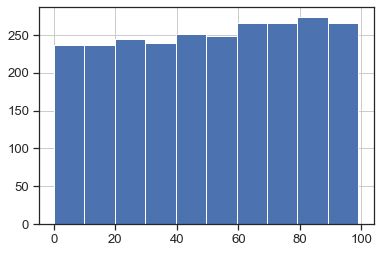

In [108]:
X_train['daily_commute'].hist()

In [109]:
zmienne_ilosciowe=["Age","daily_commute"]

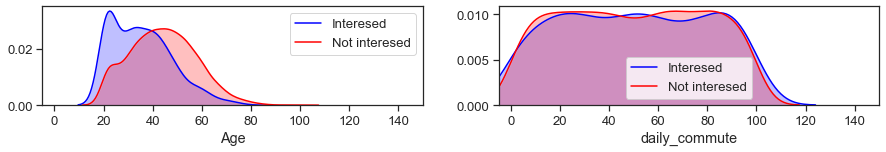

In [110]:
plt.figure(figsize=(15, 4))
sns.set(font_scale= 1.2)
sns.set_style('ticks')

for i, feature in enumerate(zmienne_ilosciowe):
    plt.subplot(2, 2, i+1)
    ax = sns.kdeplot(df[feature][df['target'] == 1], color="blue", shade=True)
    sns.kdeplot(df[feature][df['target'] == 0], color="red", shade=True)
    plt.legend(['Interesed', 'Not interesed'])
    ax.set(xlabel=feature)
    plt.xlim(-5,150) 

In [111]:
# rozkład daily_commute ze względu na zmienną celu jest taki sam - mozna usunąć zmienną

In [112]:
X_train.drop("daily_commute", axis=1, inplace=True)

In [113]:
X_test.drop("daily_commute", axis=1, inplace=True)

In [114]:
X_train.isnull().sum()

name                     0
sex                      0
location                 0
location_population      0
occupation               0
hobbies                  0
friends_number           0
relationship_status    280
education              292
credit_card_type       293
sports_interests         0
Age                      0
dtype: int64

### uzupełnianie relationship_status i education

In [115]:
X_train["relationship_status"].value_counts()

In relationship      870
Married              562
Married with kids    512
Single               435
Divorced             141
Name: relationship_status, dtype: int64

In [116]:
X_train['relationship_status'].fillna('In relationship',inplace=True)

In [117]:
X_test['relationship_status'].fillna('In relationship',inplace=True)

In [118]:
X_train["education"].value_counts()

4.0    748
5.0    532
3.0    525
2.0    346
6.0    191
1.0    166
Name: education, dtype: int64

In [119]:
X_train['education'].fillna(4.0,inplace=True)

In [120]:
X_test['education'].fillna(4.0,inplace=True)

### przekształcenie zmiennej credit_card_type

In [121]:
X_train["credit_card_type"].value_counts()

Visa                1246
Mastercard          1116
Revolut              119
American Express      26
Name: credit_card_type, dtype: int64

In [122]:
X_test["credit_card_type"].value_counts()

Visa                531
Mastercard          487
Revolut              38
American Express      9
Name: credit_card_type, dtype: int64

In [123]:
X_train["credit_card_type"].fillna("Visa", inplace=True)

In [124]:
X_test["credit_card_type"].fillna("Visa", inplace=True)

In [125]:
df["credit_card_type"]=df["credit_card_type"].apply(lambda x: x if x in ["Visa", "Mastercard"] else 'Other')

In [126]:
X_train.isnull().sum()

name                   0
sex                    0
location               0
location_population    0
occupation             0
hobbies                0
friends_number         0
relationship_status    0
education              0
credit_card_type       0
sports_interests       0
Age                    0
dtype: int64

In [127]:
X_test.isnull().sum()

name                   0
sex                    0
location               0
location_population    0
occupation             0
hobbies                0
friends_number         0
relationship_status    0
education              0
credit_card_type       0
sports_interests       0
Age                    0
dtype: int64

In [128]:
X_train.drop(["name","location", "hobbies"], axis=1, inplace=True)

In [129]:
X_test.drop(["name","location","hobbies"], axis=1, inplace=True)

In [130]:
X_train["sports_interests"].value_counts()

1    1857
0     943
Name: sports_interests, dtype: int64

## One Hot Encoding

In [131]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2800 entries, 0 to 2799
Data columns (total 9 columns):
sex                    2800 non-null object
location_population    2800 non-null int64
occupation             2800 non-null object
friends_number         2800 non-null float64
relationship_status    2800 non-null object
education              2800 non-null float64
credit_card_type       2800 non-null object
sports_interests       2800 non-null int64
Age                    2800 non-null float64
dtypes: float64(3), int64(2), object(4)
memory usage: 218.8+ KB


In [132]:
X_train.head()

,sex,location_population,occupation,friends_number,relationship_status,education,credit_card_type,sports_interests,Age
0,female,44303,professionals,164.0,In relationship,4.0,Visa,1,22.0
1,male,14702,officers,203.0,Single,2.0,Visa,1,21.0
2,male,10168,workers,266.0,In relationship,4.0,Visa,0,44.0
3,female,538633,workers,198.0,Single,3.0,Mastercard,1,22.0
4,female,196804,professionals,78.0,In relationship,4.0,Mastercard,1,35.0


In [133]:
X_test.head()

,sex,location_population,occupation,friends_number,relationship_status,education,credit_card_type,sports_interests,Age
0,male,23863,workers,199.0,In relationship,5.0,Mastercard,1,31.0
1,male,6530,clerks,125.0,In relationship,3.0,Mastercard,0,42.0
2,female,5866,workers,188.0,Married,3.0,Mastercard,1,63.0
3,female,21954,professionals,299.0,Married,4.0,Revolut,1,26.0
4,female,168394,officers,189.0,Married,2.0,Visa,1,22.0


In [134]:
X_train.replace({"male":1,"female":0}, inplace=True)

In [135]:
X_test.replace({"male":1,"female":0}, inplace=True)

In [136]:
zmienne_do_ohe=["occupation","relationship_status","education","credit_card_type"]

In [137]:
for x in zmienne_do_ohe:
    dummy_test=pd.get_dummies(X_test[x], prefix=x)
    mask=str(X_train[x].value_counts().index[0])
    dummy_test.drop(x+"_"+mask, inplace=True, axis=1)
    X_test=pd.concat([X_test, dummy_test], axis=1)
    X_test.drop(x,inplace=True, axis=1)

In [138]:
for x in zmienne_do_ohe:
    dummy_train=pd.get_dummies(X_train[x], prefix=x)
    mask=str(X_train[x].value_counts().index[0])
    dummy_train.drop(x+"_"+mask, inplace=True, axis=1)
    X_train=pd.concat([X_train, dummy_train], axis=1)
    X_train.drop(x,inplace=True, axis=1)

In [139]:
X_train.head()

,sex,location_population,friends_number,sports_interests,Age,occupation_clerks,occupation_managers,occupation_officers,occupation_professionals,relationship_status_Divorced,...,relationship_status_Married with kids,relationship_status_Single,education_1.0,education_2.0,education_3.0,education_5.0,education_6.0,credit_card_type_American Express,credit_card_type_Mastercard,credit_card_type_Revolut
0,0,44303,164.0,1,22.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,14702,203.0,1,21.0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
2,1,10168,266.0,0,44.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,538633,198.0,1,22.0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,0,196804,78.0,1,35.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [140]:
X_test.head()

,sex,location_population,friends_number,sports_interests,Age,occupation_clerks,occupation_managers,occupation_officers,occupation_professionals,relationship_status_Divorced,...,relationship_status_Married with kids,relationship_status_Single,education_1.0,education_2.0,education_3.0,education_5.0,education_6.0,credit_card_type_American Express,credit_card_type_Mastercard,credit_card_type_Revolut
0,1,23863,199.0,1,31.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,1,6530,125.0,0,42.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,5866,188.0,1,63.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,21954,299.0,1,26.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,168394,189.0,1,22.0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


### transformacja - standaryzacja

In [141]:
from sklearn.preprocessing import StandardScaler

In [142]:
std_cols=["location_population","friends_number","Age"]

In [143]:
scale = StandardScaler()

In [144]:
scale.fit(X_train[std_cols])

StandardScaler()

In [145]:
# X_train

In [146]:
X_train_scaled = pd.DataFrame(scale.transform(X_train[std_cols]), columns = ['location_population', 'freinds_number', 'Age'])

In [147]:
X_train_scaled.describe().round()

,location_population,freinds_number,Age
count,2800.0,2800.0,2800.0
mean,-0.0,-0.0,0.0
std,1.0,1.0,1.0
min,-1.0,-2.0,-2.0
25%,-1.0,-1.0,-1.0
50%,-0.0,-0.0,0.0
75%,0.0,1.0,1.0
max,3.0,3.0,3.0


In [148]:
X_train = pd.concat([X_train.drop(std_cols, axis=1), X_train_scaled], axis=1)

In [149]:
# X_test

In [150]:
X_test_scaled = pd.DataFrame(scale.transform(X_test[std_cols]), columns = ['location_population', 'freinds_number', 'Age'])

In [151]:
X_test = pd.concat([X_test.drop(std_cols, axis=1), X_test_scaled], axis=1)

In [152]:
X_train.head()

,sex,sports_interests,occupation_clerks,occupation_managers,occupation_officers,occupation_professionals,relationship_status_Divorced,relationship_status_Married,relationship_status_Married with kids,relationship_status_Single,...,education_2.0,education_3.0,education_5.0,education_6.0,credit_card_type_American Express,credit_card_type_Mastercard,credit_card_type_Revolut,location_population,freinds_number,Age
0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,-0.550215,-0.398494,-1.596614
1,1,1,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,-0.609667,0.032297,-1.674277
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.618773,0.728191,0.111963
3,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0.442626,-0.022932,-1.596614
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,-0.243923,-1.348444,-0.587000


In [153]:
X_test.head()

,sex,sports_interests,occupation_clerks,occupation_managers,occupation_officers,occupation_professionals,relationship_status_Divorced,relationship_status_Married,relationship_status_Married with kids,relationship_status_Single,...,education_2.0,education_3.0,education_5.0,education_6.0,credit_card_type_American Express,credit_card_type_Mastercard,credit_card_type_Revolut,location_population,freinds_number,Age
0,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,-0.591267,-0.011886,-0.897651
1,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,-0.626080,-0.829285,-0.043362
2,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,-0.627414,-0.133392,1.587553
3,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,-0.595102,1.092706,-1.285964
4,0,1,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,-0.300983,-0.122346,-1.596614


## Wybór zmiennych 

In [154]:
corr = X_train.corr()
matrix = np.triu(X_train.corr())

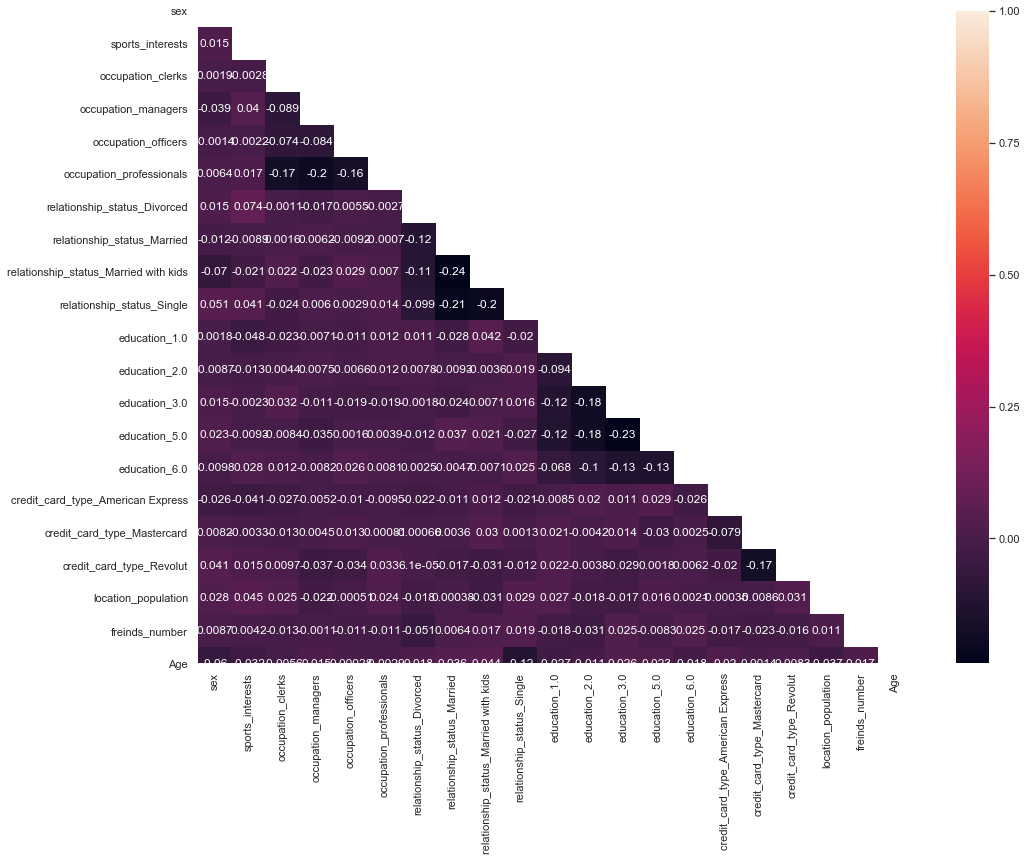

In [155]:
sns.set(style="white")
fig, ax = plt.subplots(figsize=(16,12))

sns.heatmap(corr, mask=matrix, annot=True)

### smothe oversampling

In [156]:
from imblearn.over_sampling import SMOTE

In [157]:
smote = SMOTE(random_state=0, sampling_strategy=0.35)

In [158]:
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [159]:
y_resampled.value_counts()

0    2232
1     781
Name: target, dtype: int64

In [160]:
y_resampled.value_counts(normalize=True)

0    0.74079
1    0.25921
Name: target, dtype: float64

In [161]:
y_train.value_counts(normalize=True)

0    0.797143
1    0.202857
Name: target, dtype: float64

## Model regresji logistycznej 

In [162]:
from sklearn.linear_model import LogisticRegression

In [163]:
lr1 = LogisticRegression(max_iter=1000, random_state=123)

In [164]:
lr1.fit(X_resampled, y_resampled)

LogisticRegression(max_iter=1000, random_state=123)

In [165]:
y_pred = lr1.predict(X_test)

In [166]:
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [167]:
from sklearn.metrics import confusion_matrix

In [168]:
confMatrix=confusion_matrix(y_test, y_pred)

In [169]:
confMatrix=pd.DataFrame(confMatrix)
confMatrix.columns=[['Predicted 0','Predicted 1']]
confMatrix.index=[['True 0','True 1']]
print('')
print('Confusion Matrix :')
print(confMatrix)


Confusion Matrix :
       Predicted 0 Predicted 1
True 0         886          76
True 1         156          82


In [170]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, roc_auc_score

In [171]:
lr1_accuracy = accuracy_score(y_test, y_pred)
lr1_accuracy

0.8066666666666666

In [172]:
lr1_recall = recall_score(y_test, y_pred)
lr1_recall

0.3445378151260504

In [173]:
lr1_precision = precision_score(y_test, y_pred)
lr1_precision

0.5189873417721519

In [174]:
lr1_f1 = f1_score(y_test, y_pred)
lr1_f1

0.4141414141414141

### Raport klasyfikacji

In [175]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       962
           1       0.52      0.34      0.41       238

    accuracy                           0.81      1200
   macro avg       0.68      0.63      0.65      1200
weighted avg       0.78      0.81      0.79      1200



In [176]:
y_pred_train = lr1.predict(X_resampled)
print(classification_report(y_resampled,y_pred_train))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      2232
           1       0.68      0.46      0.55       781

    accuracy                           0.80      3013
   macro avg       0.76      0.69      0.71      3013
weighted avg       0.79      0.80      0.79      3013



In [177]:
y_pred_train = lr1.predict(X_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      2232
           1       0.61      0.45      0.52       568

    accuracy                           0.83      2800
   macro avg       0.74      0.69      0.71      2800
weighted avg       0.82      0.83      0.82      2800



In [178]:
# model lepiej radzi sobie na danych treningowych - model niedouczony 

In [179]:
y_pred_proba = lr1.predict_proba(X_test)[:,1]

In [180]:
y_pred_proba

array([0.5829342 , 0.07223662, 0.04136463, ..., 0.00537989, 0.04940759,
       0.14615812])

In [181]:
from sklearn import metrics

In [182]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

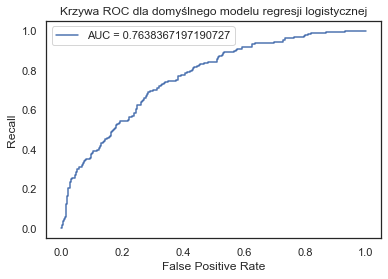

In [183]:
lr1_auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC = "+str(lr1_auc))
plt.title('Krzywa ROC dla domyślnego modelu regresji logistycznej')
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.legend()
plt.show()

In [184]:
results1 = pd.DataFrame({
    'model': ['RL'], 
    'accuracy': [lr1_accuracy],
    'precision': [lr1_precision],
    'recall': [lr1_recall],
    'f1-score': [lr1_f1],
    'auc': [lr1_auc]
    })

In [185]:
results1

,model,accuracy,precision,recall,f1-score,auc
0,RL,0.806667,0.518987,0.344538,0.414141,0.763837


### Regresja logistyczna z optymalizacją

In [186]:
from sklearn.model_selection import GridSearchCV

In [187]:
model = LogisticRegression(max_iter=1000, random_state=123)

In [188]:
params = {
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [1000, 100, 10, 1.0, 0.1, 0.01, 0.001]
}

In [189]:
grid_search = GridSearchCV(estimator=model, param_grid=params, n_jobs=-1, cv=5, scoring='roc_auc')

In [190]:
grid_result = grid_search.fit(X_resampled, y_resampled)

In [191]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.824782 using {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [192]:
lr_opt = grid_result.best_estimator_

In [193]:
lr_opt.fit(X_resampled,y_resampled)

LogisticRegression(C=0.1, max_iter=1000, random_state=123, solver='liblinear')

In [194]:
y_pred = lr_opt.predict(X_test)

In [195]:
confMatrix=confusion_matrix(y_test, y_pred)

In [196]:
confMatrix=pd.DataFrame(confMatrix)
confMatrix.columns=[['Predicted 0','Predicted 1']]
confMatrix.index=[['True 0','True 1']]
print('')
print('Confusion Matrix :')
print(confMatrix)


Confusion Matrix :
       Predicted 0 Predicted 1
True 0         901          61
True 1         158          80


In [197]:
lr_opt_accuracy = accuracy_score(y_test, y_pred)
lr_opt_recall = recall_score(y_test, y_pred)
lr_opt_precision = precision_score(y_test, y_pred)
lr_opt_f1 = f1_score(y_test, y_pred)

In [198]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       962
           1       0.57      0.34      0.42       238

    accuracy                           0.82      1200
   macro avg       0.71      0.64      0.66      1200
weighted avg       0.79      0.82      0.80      1200



In [199]:
# bardzo zbliżone miary do poprzedniego modelu 

In [200]:
y_pred_train = lr_opt.predict(X_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      2232
           1       0.64      0.43      0.51       568

    accuracy                           0.83      2800
   macro avg       0.75      0.68      0.71      2800
weighted avg       0.82      0.83      0.82      2800



In [201]:
# model lepiej radzi sobie na danych treningowych - model niedouczony 

#### Krzywa ROC 

In [202]:
y_preds_lr_opt = lr_opt.predict_proba(X_test)[:,1]

In [203]:
lr_opt_auc = roc_auc_score(y_test, y_preds_lr_opt)

In [204]:
fpr_lr_opt, tpr_lr_opt, _ = metrics.roc_curve(y_test, y_preds_lr_opt)

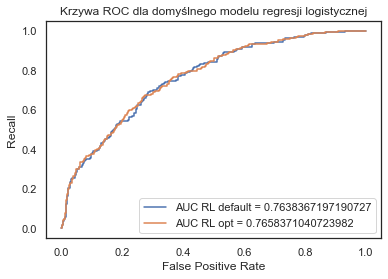

In [205]:
plt.plot(fpr,tpr,label="AUC RL default = "+str(lr1_auc))
plt.plot(fpr_lr_opt,tpr_lr_opt,label="AUC RL opt = "+str(lr_opt_auc))
plt.title('Krzywa ROC dla domyślnego modelu regresji logistycznej')
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.legend()
plt.show()

In [206]:
## Bardzo niewielki wzrost miary AUC po optymalizacji

In [207]:
results2 = pd.DataFrame({
    'model': ['RL opt'], 
    'accuracy': [lr_opt_accuracy],
    'precision': [lr_opt_precision],
    'recall': [lr_opt_recall],
    'f1-score': [lr_opt_f1],
    'auc': [lr_opt_auc]
    })

In [208]:
results2

,model,accuracy,precision,recall,f1-score,auc
0,RL opt,0.8175,0.567376,0.336134,0.422164,0.765837


### Drzewo decyzyjne 

In [209]:
from sklearn.tree import DecisionTreeClassifier

In [210]:
dt = DecisionTreeClassifier(random_state=42)

In [211]:
params = {
    'max_depth': np.arange(2,20),
    'min_samples_leaf': np.arange(5,101),
    'min_samples_split': np.arange(5,26),
    'criterion': ["gini", "entropy"],
    'max_features': np.arange(5,18)
}

In [212]:
from sklearn.model_selection import RandomizedSearchCV

In [213]:
random_search = RandomizedSearchCV(estimator=dt, 
                           param_distributions=params, 
                           cv=5, n_jobs=-1, scoring = "roc_auc", n_iter=1000, random_state=123)

In [214]:
random_search.fit(X_resampled, y_resampled)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'max_features': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]),
                                        'min_samples_leaf': array([  5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
        18,  19,  20,  21,  22,  23...6,  27,  28,  29,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
        57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  

In [215]:
print("Best: %f using %s" % (random_search.best_score_, random_search.best_params_))

Best: 0.872308 using {'min_samples_split': 16, 'min_samples_leaf': 36, 'max_features': 16, 'max_depth': 14, 'criterion': 'entropy'}


In [216]:
dt_opt = random_search.best_estimator_

In [217]:
y_pred = dt_opt.predict(X_test)

In [218]:
confMatrix=confusion_matrix(y_test, y_pred)

In [219]:
confMatrix=pd.DataFrame(confMatrix)
confMatrix.columns=[['Predicted 0','Predicted 1']]
confMatrix.index=[['True 0','True 1']]
print('')
print('Confusion Matrix :')
print(confMatrix)


Confusion Matrix :
       Predicted 0 Predicted 1
True 0         868          94
True 1         132         106


In [220]:
dt_opt_recall = recall_score(y_test, y_pred)
dt_opt_precision = precision_score(y_test, y_pred)
dt_opt_f1 = f1_score(y_test, y_pred)
dt_opt_accuracy = accuracy_score(y_test, y_pred)

In [221]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       962
           1       0.53      0.45      0.48       238

    accuracy                           0.81      1200
   macro avg       0.70      0.67      0.68      1200
weighted avg       0.80      0.81      0.81      1200



In [222]:
y_pred_train = dt_opt.predict(X_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92      2232
           1       0.69      0.59      0.64       568

    accuracy                           0.86      2800
   macro avg       0.79      0.76      0.78      2800
weighted avg       0.86      0.86      0.86      2800



In [223]:
## model lepiej radzi sobie na danych treningowych niz testowych - model przeuczony 

#### Krzywa ROC

In [224]:
y_preds_dt_opt = dt_opt.predict_proba(X_test)[:,1]

In [225]:
dt_opt_auc = roc_auc_score(y_test, y_preds_dt_opt)

In [226]:
fpr_dt_opt, tpr_dt_opt, _ = metrics.roc_curve(y_test, y_preds_dt_opt)

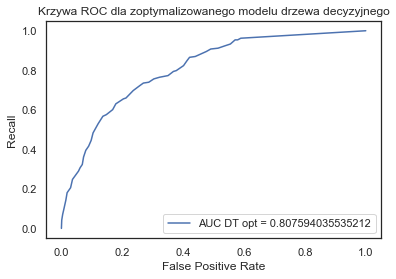

In [227]:
plt.plot(fpr_dt_opt,tpr_dt_opt,label="AUC DT opt = "+str(dt_opt_auc))
plt.title('Krzywa ROC dla zoptymalizowanego modelu drzewa decyzyjnego')
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.legend()
plt.show()

In [228]:
results3 = pd.DataFrame({
    'model': ['Decision tree opt'], 
    'accuracy': [dt_opt_auc],
    'precision': [dt_opt_precision],
    'recall': [dt_opt_recall],
    'f1-score': [dt_opt_f1],
    'auc': [dt_opt_auc]
    })

In [229]:
results3

,model,accuracy,precision,recall,f1-score,auc
0,Decision tree opt,0.807594,0.53,0.445378,0.484018,0.807594


### Budowa modelu lasu losowego 

In [230]:
from sklearn.ensemble import RandomForestClassifier

In [231]:
params = {
    'bootstrap': [True, False],
    'n_estimators': np.arange(10,150,30),
    'max_depth': np.arange(3,15),
    'min_samples_leaf': np.arange(20,100),
    'min_samples_split': np.arange(20,100),
    'criterion': ["gini", "entropy"],
    'max_features': ['log2', 'sqrt', None]
}

In [232]:
rfc = RandomForestClassifier(random_state=123)

In [233]:
random_search = RandomizedSearchCV(estimator=rfc, 
                           param_distributions=params, 
                           cv=3, n_jobs=-1, scoring = "roc_auc", n_iter=200, random_state=123)

In [234]:
random_search.fit(X_resampled, y_resampled)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=123),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'max_features': ['log2', 'sqrt', None],
                                        'min_samples_leaf': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41...
       88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                                        'min_samples_split': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 79,

In [235]:
print("Best: %f using %s" % (random_search.best_score_, random_search.best_params_))

Best: 0.883152 using {'n_estimators': 130, 'min_samples_split': 41, 'min_samples_leaf': 28, 'max_features': None, 'max_depth': 12, 'criterion': 'entropy', 'bootstrap': True}


In [236]:
rfc_opt = random_search.best_estimator_

In [237]:
y_pred = rfc_opt.predict(X_test)

In [238]:
confMatrix=confusion_matrix(y_test, y_pred)

In [239]:
confMatrix=pd.DataFrame(confMatrix)
confMatrix.columns=[['Predicted 0','Predicted 1']]
confMatrix.index=[['True 0','True 1']]
print('')
print('Confusion Matrix :')
print(confMatrix)


Confusion Matrix :
       Predicted 0 Predicted 1
True 0         861         101
True 1         115         123


In [240]:
rf_opt_recall = recall_score(y_test, y_pred)
rf_opt_precision = precision_score(y_test, y_pred)
rf_opt_f1 = f1_score(y_test, y_pred)
rf_opt_accuracy = accuracy_score(y_test, y_pred)

In [241]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       962
           1       0.55      0.52      0.53       238

    accuracy                           0.82      1200
   macro avg       0.72      0.71      0.71      1200
weighted avg       0.82      0.82      0.82      1200



In [242]:
y_pred_train = rfc_opt.predict(X_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      2232
           1       0.67      0.65      0.66       568

    accuracy                           0.86      2800
   macro avg       0.79      0.78      0.79      2800
weighted avg       0.86      0.86      0.86      2800



In [243]:
## model lekko przeuczony 

In [244]:
y_preds_rf_opt = rfc_opt.predict_proba(X_test)[:,1]

In [245]:
rf_opt_auc = roc_auc_score(y_test, y_preds_rf_opt)

In [246]:
fpr_rf_opt, tpr_rf_opt, _ = metrics.roc_curve(y_test, y_preds_rf_opt)

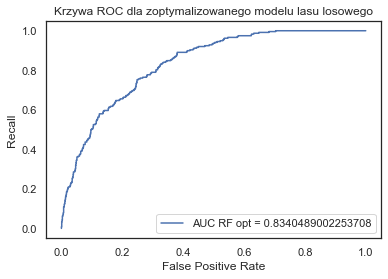

In [247]:
plt.plot(fpr_rf_opt,tpr_rf_opt,label="AUC RF opt = "+str(rf_opt_auc))
plt.title('Krzywa ROC dla zoptymalizowanego modelu lasu losowego')
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.legend()
plt.show()

In [248]:
results4 = pd.DataFrame({
    'model': ['Random forest opt'], 
    'accuracy': [rf_opt_accuracy],
    'precision': [rf_opt_precision],
    'recall': [rf_opt_recall],
    'f1-score': [rf_opt_f1],
    'auc': [rf_opt_auc]
    })

In [249]:
results4

,model,accuracy,precision,recall,f1-score,auc
0,Random forest opt,0.82,0.549107,0.516807,0.532468,0.834049


### XGB - Random Search 

In [250]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

In [251]:
params = {
    'max_depth': np.arange(3,10),
    'min_child_weight': np.arange(8,15),
    'gamma': np.arange(0,0.5,0.1),
    'subsample': [i/10 for i in range(6,11)],
    'colsample_bytree': [i/10 for i in range(6,11)],
    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
    'n_estimators': np.arange(10,150,30),
    'learning_rate': [0.01, 0.1, 0.2, 0.3]
}

In [252]:
xgb = XGBClassifier(objective= 'binary:logistic')

In [253]:
random_search = RandomizedSearchCV(estimator=xgb, 
                           param_distributions=params, 
                           cv=5, n_jobs=-1, scoring = "roc_auc", n_iter=100, random_state=123)

In [254]:
random_search.fit(X_resampled, y_resampled)

[19:26:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                 

In [255]:
print("Best: %f using %s" % (random_search.best_score_, random_search.best_params_))

Best: 0.894118 using {'subsample': 0.9, 'reg_alpha': 0.1, 'n_estimators': 70, 'min_child_weight': 9, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.7}


In [256]:
xgb_opt = random_search.best_estimator_

In [257]:
print("Best: %f using %s" % (random_search.best_score_, random_search.best_params_))

Best: 0.894118 using {'subsample': 0.9, 'reg_alpha': 0.1, 'n_estimators': 70, 'min_child_weight': 9, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.7}


In [258]:
y_pred = xgb_opt.predict(X_test)

In [259]:
xgb_opt_recall = recall_score(y_test, y_pred)
xgb_opt_precision = precision_score(y_test, y_pred)
xgb_opt_f1 = f1_score(y_test, y_pred)
xgb_opt_accuracy = accuracy_score(y_test, y_pred)

In [260]:
confMatrix=confusion_matrix(y_test, y_pred)

In [261]:
confMatrix=pd.DataFrame(confMatrix)
confMatrix.columns=[['Predicted 0','Predicted 1']]
confMatrix.index=[['True 0','True 1']]
print('')
print('Confusion Matrix :')
print(confMatrix)


Confusion Matrix :
       Predicted 0 Predicted 1
True 0         867          95
True 1         122         116


In [262]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       962
           1       0.55      0.49      0.52       238

    accuracy                           0.82      1200
   macro avg       0.71      0.69      0.70      1200
weighted avg       0.81      0.82      0.81      1200



In [263]:
y_pred_train = xgb_opt.predict(X_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      2232
           1       0.70      0.62      0.66       568

    accuracy                           0.87      2800
   macro avg       0.80      0.78      0.79      2800
weighted avg       0.86      0.87      0.87      2800



In [264]:
## model wygląda na trochę przeuczony 

### Krzywa ROC 

In [265]:
y_preds_xgb_opt = xgb_opt.predict_proba(X_test)[:,1]

In [266]:
xgb_opt_auc = roc_auc_score(y_test, y_preds_xgb_opt)

In [267]:
fpr_xgb_opt, tpr_xgb_opt, _ = metrics.roc_curve(y_test, y_preds_xgb_opt)

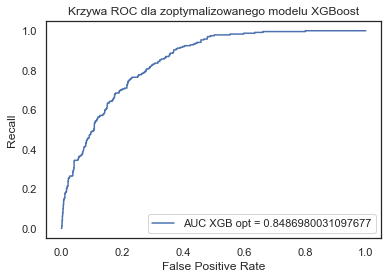

In [268]:
plt.plot(fpr_xgb_opt,tpr_xgb_opt,label="AUC XGB opt = "+str(xgb_opt_auc))
plt.title('Krzywa ROC dla zoptymalizowanego modelu XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.legend()
plt.show()

In [269]:
results5 = pd.DataFrame({
    'model': ['XGB opt'], 
    'accuracy': [xgb_opt_accuracy],
    'precision': [xgb_opt_precision],
    'recall': [xgb_opt_recall],
    'f1-score': [xgb_opt_f1],
    'auc': [xgb_opt_auc]
    })

In [270]:
results5

,model,accuracy,precision,recall,f1-score,auc
0,XGB opt,0.819167,0.549763,0.487395,0.516704,0.848698


### Zestawienie modeli 

In [271]:
pd.concat([results2, results3, results4, results5])

,model,accuracy,precision,recall,f1-score,auc
0,RL opt,0.817500,0.567376,0.336134,0.422164,0.765837
0,Decision tree opt,0.807594,0.530000,0.445378,0.484018,0.807594
0,Random forest opt,0.820000,0.549107,0.516807,0.532468,0.834049
0,XGB opt,0.819167,0.549763,0.487395,0.516704,0.848698


In [272]:
## najlepszy model to model lasu losowego - ma najwyższy recall i f1-score 